## Experimental Evaluation of Classification Techniques for Credit Scoring.

#### Machine Learning Algorithms
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. AdaBoost
5. CART


#### Defining the problem statement:

Create a predictive model which can tell whether to approve a loan application or not.

1. Target Variable: Good Credit
2. Predictors: duration, history, purpose, amount, savings etc.

Good Credit = 1 means the loan was a good decision.
Good Credit = 0 means the loan was a bad decision.

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as profiling
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, accuracy_score


#### Loading German Credit Dataset

In [2]:
df = pd.read_csv('german.csv', header = None)
print(df.shape)
df.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


#### Renaming header's name

In [3]:
header_name=["status", "duration","credit_history","purpose","credit_amount","savings_account","employment_duration","installment_rate","personal_status&sex","guarantors","residence_duration","property","age","installment_plan","housing","existing_credit","job","people","telephone","foreign_worker","result"]

df.columns = header_name

In [4]:
print(df.shape)
df.head()

(1000, 21)


,status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status&sex,guarantors,...,property,age,installment_plan,housing,existing_credit,job,people,telephone,foreign_worker,result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
print(df.isnull().sum())

status                 0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_account        0
employment_duration    0
installment_rate       0
personal_status&sex    0
guarantors             0
residence_duration     0
property               0
age                    0
installment_plan       0
housing                0
existing_credit        0
job                    0
people                 0
telephone              0
foreign_worker         0
result                 0
dtype: int64


In [6]:
df.isna().sum()

status                 0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_account        0
employment_duration    0
installment_rate       0
personal_status&sex    0
guarantors             0
residence_duration     0
property               0
age                    0
installment_plan       0
housing                0
existing_credit        0
job                    0
people                 0
telephone              0
foreign_worker         0
result                 0
dtype: int64

#### Converting all categorical data to numerical data

In [7]:
# fetch all categorical feature

df_cat_cols = list(df.columns[df.dtypes == 'object'])
print("List of categorical columns :- ", df_cat_cols)

List of categorical columns :-  ['status', 'credit_history', 'purpose', 'savings_account', 'employment_duration', 'personal_status&sex', 'guarantors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']


In [8]:
le = LabelEncoder()

for i in df_cat_cols:
    df[i] = le.fit_transform(df[i])

In [9]:
df.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status&sex,guarantors,...,property,age,installment_plan,housing,existing_credit,job,people,telephone,foreign_worker,result
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


#### Explaratory Data Analysis

In [10]:
df2 = df.copy()

In [11]:
### Pandas-Profiling

profiling.ProfileReport(df)

#### Outlier Detection and removal

60.0 20.0
2


<AxesSubplot:xlabel='age'>

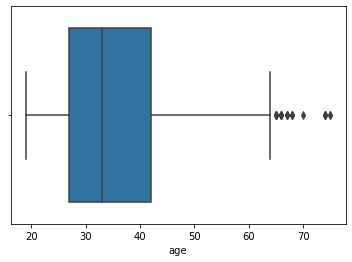

In [12]:
max_age = df2['age'].quantile(0.95)
min_age = df2['age'].quantile(0.01)

print(max_age, min_age)
print((df2['age'] < min_age).sum())

sns.boxplot(x=df2['age'])

#### Divide the dataset into independent and dependent variable

In [13]:
df2 = df[(df['age'] > min_age) & (df['age'] < max_age)]

In [14]:
X = df2.iloc[ : , 0:20]
X.head()
X.shape

(933, 20)

In [15]:
le = LabelEncoder()
df2['result'] = le.fit_transform(df2['result'])

y = df2['result']
y.head()

<ipython-input-15-d80911a11651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['result'] = le.fit_transform(df2['result'])


1    1
2    0
3    0
4    1
5    0
Name: result, dtype: int64

#### Normalization 

In [16]:
scaler=preprocessing.MinMaxScaler()
scalardata=scaler.fit_transform(X)

In [17]:
print(scalardata)

[[0.33333333 0.64705882 0.5        ... 0.         0.         0.        ]
 [1.         0.11764706 1.         ... 1.         0.         0.        ]
 [0.         0.55882353 0.5        ... 1.         0.         0.        ]
 ...
 [1.         0.11764706 0.5        ... 0.         0.         0.        ]
 [0.         0.60294118 0.5        ... 0.         1.         0.        ]
 [0.33333333 0.60294118 1.         ... 0.         0.         0.        ]]


#### Spliting data set into X_train, y_train, X_test and y_test

In [18]:
np.random.seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((653, 20), (653,), (280, 20), (280,))

### Building model for Logistic Regression

In [19]:
lr = LogisticRegression(C=1, solver='newton-cg')
logisticmodel = lr.fit(X_train, y_train)

In [27]:
print("Accuracy Value of Testing dataset :", round(logisticmodel.score(X_test, y_test), 2))

Accuracy Value of Testing dataset : 0.74


#### Creating Confusing Matrix

In [23]:
y_pred_logistic = logisticmodel.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred_logistic))

[[170  28]
 [ 45  37]]


In [25]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       198
           1       0.57      0.45      0.50        82

    accuracy                           0.74       280
   macro avg       0.68      0.65      0.66       280
weighted avg       0.73      0.74      0.73       280



In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

F1_Score=metrics.f1_score(y_test, y_pred_logistic, average='weighted')
print('F1-score accuracy of the model on Testing Sample Data :', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(logisticmodel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

F1-score accuracy of the model on Testing Sample Data : 0.73

Accuracy values for 10-fold Cross Validation:

 [0.79540274 0.68023869 0.73491212 0.72791024 0.75988406 0.75032394
 0.67866095 0.78494624 0.76730621 0.77300262]

Final Average Accuracy of the model: 0.75


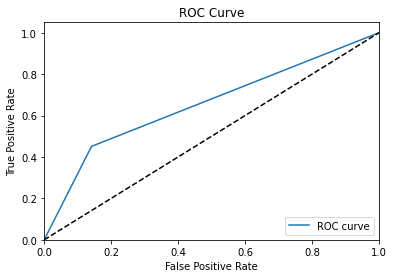

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_logistic)
# Calculate the AUC
#roc_auc = auc(fpr, tpr)
#print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Building model for Decision Tree

In [32]:
from sklearn import tree
decisionModel = tree.DecisionTreeClassifier(max_depth = 5, criterion = "entropy", random_state=33)
decisionModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=33)

In [33]:
print("Accuracy Value of test on Decision Tree : %.2f" % decisionModel.score(X_test, y_test))

Accuracy Value of test on Decision Tree : 0.71


#### Creating a Confusing Matrix

In [34]:
y_pred_decision = decisionModel.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred_decision))
print(classification_report(y_test, y_pred_decision))
print("Accuracy Value of Decision Tree : %.2f" % decisionModel.score(X_test, y_test))

[[146  52]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       198
           1       0.51      0.66      0.57        82

    accuracy                           0.71       280
   macro avg       0.67      0.70      0.68       280
weighted avg       0.74      0.71      0.72       280

Accuracy Value of Decision Tree : 0.71


In [36]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred_decision, average='weighted')
print('F1_score accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(decisionModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

F1_score accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:

 [0.72340426 0.72947054 0.75095598 0.72791024 0.67983503 0.74617645
 0.68742533 0.69411975 0.67898793 0.69635709]

Final Average Accuracy of the model: 0.71


[Text(362.70000000000005, 498.3, 'X[0] <= 1.5\nentropy = 0.887\nsamples = 653\nvalue = [454, 199]'),
 Text(130.20000000000002, 407.70000000000005, 'X[1] <= 11.5\nentropy = 0.995\nsamples = 354\nvalue = [192, 162]'),
 Text(37.2, 317.1, 'X[11] <= 0.5\nentropy = 0.657\nsamples = 53\nvalue = [44, 9]'),
 Text(18.6, 226.5, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(55.800000000000004, 226.5, 'X[12] <= 35.5\nentropy = 0.918\nsamples = 27\nvalue = [18, 9]'),
 Text(37.2, 135.89999999999998, 'X[3] <= 0.5\nentropy = 0.998\nsamples = 19\nvalue = [10, 9]'),
 Text(18.6, 45.299999999999955, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(55.800000000000004, 45.299999999999955, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(74.4, 135.89999999999998, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(223.20000000000002, 317.1, 'X[5] <= 1.5\nentropy = 1.0\nsamples = 301\nvalue = [148, 153]'),
 Text(148.8, 226.5, 'X[1] <= 47.5\nentropy = 0.989\nsamples = 237\nvalue = [104, 13

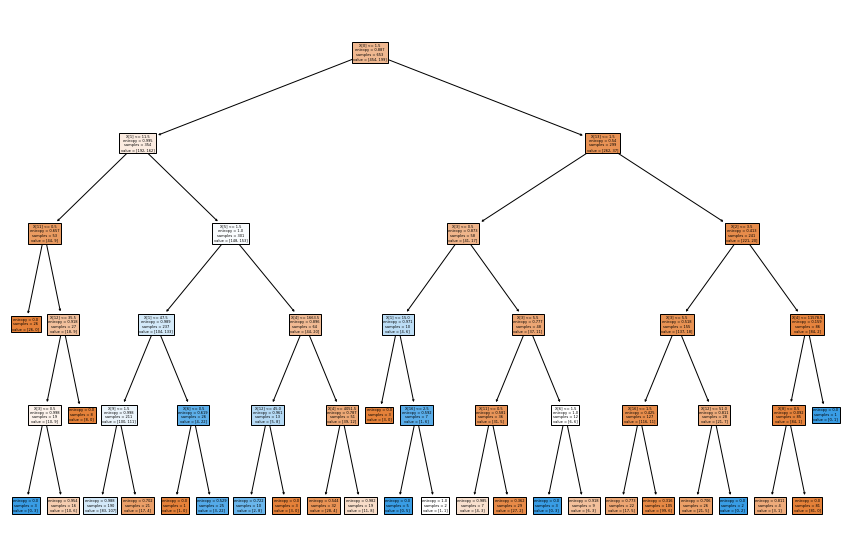

In [37]:
plt.figure(figsize = (15, 10))
tree.plot_tree(decisionModel, filled=True)

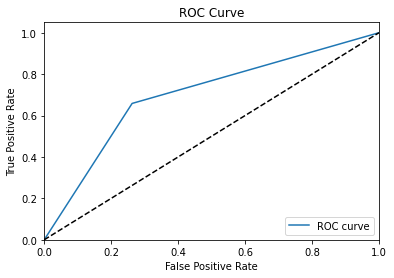

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_pred_decision)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Pruned Decision Tree

In [39]:
path = decisionModel.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [41]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.023)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.023, random_state=0)

In [42]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7071428571428572

[Text(418.5, 407.70000000000005, 'X[0] <= 1.5\ngini = 0.424\nsamples = 653\nvalue = [454, 199]'),
 Text(209.25, 135.89999999999998, 'gini = 0.496\nsamples = 354\nvalue = [192, 162]'),
 Text(627.75, 135.89999999999998, 'gini = 0.217\nsamples = 299\nvalue = [262, 37]')]

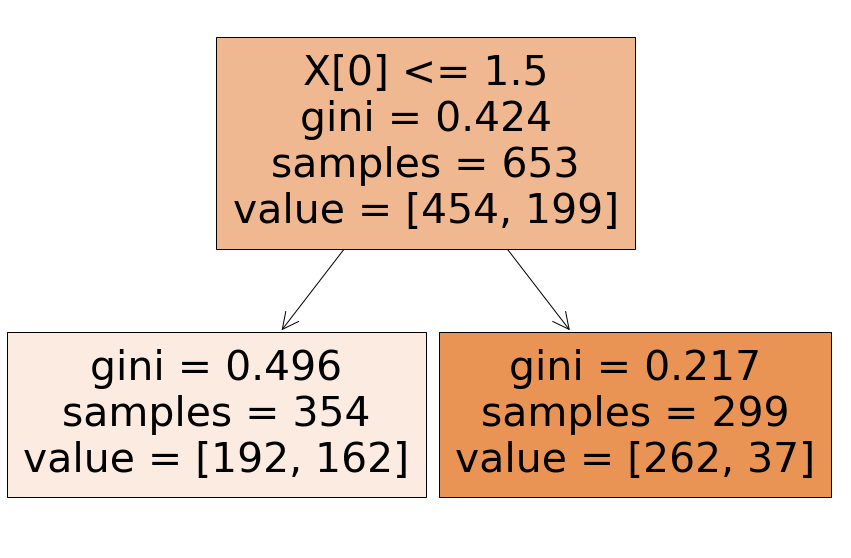

In [43]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

### Building model for Random Forest

In [62]:
randomFModel = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_features = "auto", random_state = 33)
randomFModel.fit(X_train, y_train)
print("Accuracy on testing dataset %0.4f " %  randomFModel.score(X_test, y_test))

Accuracy on testing dataset 0.7714 


In [45]:
random_predict = randomFModel.predict(X_test)
print(confusion_matrix(y_test, random_predict))

[[181  17]
 [ 47  35]]


In [46]:
print(classification_report(y_test, random_predict))
print("Accuracy of Random Forest is : %0.2f" % accuracy_score(y_test, random_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       198
           1       0.67      0.43      0.52        82

    accuracy                           0.77       280
   macro avg       0.73      0.67      0.69       280
weighted avg       0.76      0.77      0.75       280

Accuracy of Random Forest is : 0.77


In [47]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, random_predict, average='weighted')
print('F1_score accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(randomFModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

F1_score accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.77266971 0.70307879 0.74778997 0.75032394 0.75955795 0.72179905
 0.75032394 0.79232619 0.70881314 0.73701588]

Final Average Accuracy of the model: 0.74


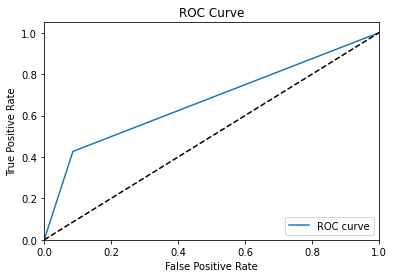

In [63]:
fpr, tpr, _ = roc_curve(y_test, random_predict)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Building Model for AdaBoost

In [50]:
adboostModel = AdaBoostClassifier()
adboostModel.fit(X_train, y_train)

print("Accuracy on testing dataset %0.4f " %  round(adboostModel.score(X_test, y_test),2))

Accuracy on testing dataset 0.7700 


#### new AdaBoost model with grid search

In [51]:
param_grid = {'learning_rate':[0.05, 0.1], 'n_estimators':[50, 100, 200]}
ada_grid = AdaBoostClassifier()
ada_grid_search = GridSearchCV(estimator = ada_grid, param_grid = param_grid, cv = 5)
ada_grid_result = ada_grid_search.fit(X_train, y_train)

print("Best Parameters are : ", ada_grid_search.best_params_)

Best Parameters are :  {'learning_rate': 0.1, 'n_estimators': 200}


In [58]:
ada_best_parameter = AdaBoostClassifier(learning_rate = ada_grid_result.best_params_['learning_rate'], n_estimators = ada_grid_result.best_params_['n_estimators'])
ada_best_parameter.fit(X_train, y_train)

print("Accuracy on training set with best parameters : %0.2f " % ada_best_parameter.score(X_train, y_train))

Accuracy on training set with best parameters : 0.78 


In [59]:
print(confusion_matrix(y_test, ada_best_parameter.predict(X_test)))

[[180  18]
 [ 50  32]]


In [60]:
ada_predict = ada_best_parameter.predict(X_test)

print("Classification Report : ", classification_report(y_test, ada_predict))
print("Accuracy of new AdaBoost Model is : %.2f" % accuracy_score(y_test, ada_predict))

Classification Report :                precision    recall  f1-score   support

           0       0.78      0.91      0.84       198
           1       0.64      0.39      0.48        82

    accuracy                           0.76       280
   macro avg       0.71      0.65      0.66       280
weighted avg       0.74      0.76      0.74       280

Accuracy of new AdaBoost Model is : 0.76


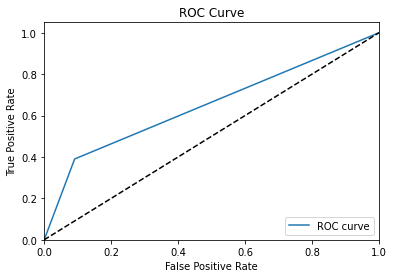

In [64]:
fpr, tpr, _ = roc_curve(y_test, ada_predict)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Building Model for CART (Classification and Regression Tree)

In [ ]:
cart_dt = DecisionTreeClassifier ( criterion = 'gini', min_samples_split = 50)
cart_dt.fit( X_train , y_train )

In [ ]:
y_pred_cart = cart_dt.predict(X_test)
cart_pred_dt = cart_dt.score(X_test, y_test)
print("Accuracy of CART Model : ", cart_pred_dt)

In [ ]:
print ('Confusion Matrix for CART ')
confusion_matrix(y_test, y_pred_cart)

In [ ]:
print("Classification Report : ", classification_report(y_test, y_pred_cart))
print("Accuracy of CART Model is : %.2f" % accuracy_score(y_test, y_pred_cart))

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred_cart, average='weighted')
print('F1_score accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(cart_dt, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))